<h1 align='center'> Thesis Group : 01
<h3 align='center'>Md. Ettashamul Haque | Roll : FH-092-002</h3>
<h3 align='center'>Atique Tajwar | Roll : SH-092-015</h3>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
import easyocr

C:\Users\Atique\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
#load the images
image= cv2.imread('carplate3.jpg')

# Filtering and Edge detection

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [4]:
filter= cv2.bilateralFilter(gray, 11,17,17)
edge= cv2.Canny(filter, 30,200)

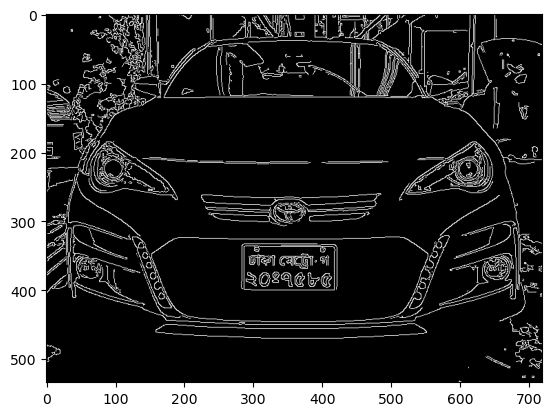

In [5]:
#Converting color

plt.imshow(cv2.cvtColor(edge, cv2.COLOR_BGR2RGB))

# Extracting Counters

In [6]:
ext_count= cv2.findContours(edge.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contours= imutils.grab_contours(ext_count)
contours= sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [7]:
location= None

for contour in contours:
    apprx= cv2.approxPolyDP(
        contour, 10, True)

    if len(apprx)==4:
      location=apprx

      break


In [8]:
location

array([[[287, 337]],

       [[287, 399]],

       [[418, 400]],

       [[416, 337]]], dtype=int32)

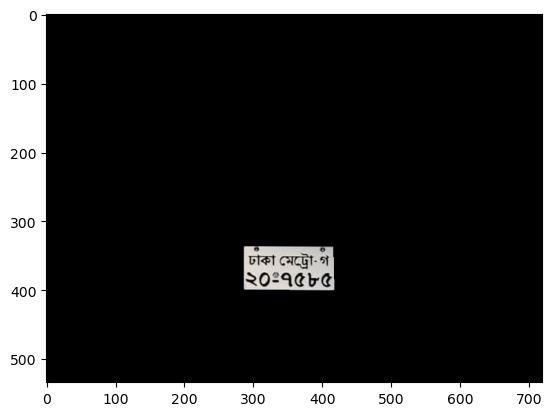

In [9]:
#masking
#extracting the plate

msk= np.zeros(gray.shape, np.uint8)

extracted_plate= cv2.drawContours(msk, [location], 0,255, -1)
extracted_plate= cv2.bitwise_and(image, image, mask=msk)

plt.imshow(cv2.cvtColor(extracted_plate, cv2.COLOR_BGR2RGB))

In [10]:
(x, y)= np.where(msk==255)

(x1, y1)= (np.min(x), np.min(y))
(x2, y2)= (np.max(x), np.max(y))

final_plate= gray[x1:x2+1,
                  y1:y2+1]

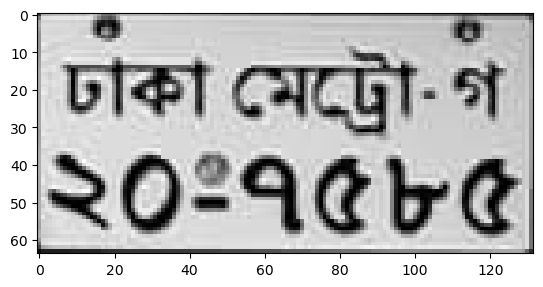

In [11]:
#final plate

plt.imshow(cv2.cvtColor(final_plate, cv2.COLOR_BGR2RGB))

# Apply EasyOCR

In [12]:
read_char= easyocr.Reader(['bn'])  #bangla character reading with 'bn'

detected= read_char.readtext(final_plate)  #read from final extracted plate


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [13]:
#show the detected number

detected

[([[2, 6], [128, 6], [128, 36], [2, 36]], 'ঢাকা মেট্রো-গ', 0.4868743751966726),
 ([[0, 31], [132, 31], [132, 63], [0, 63]], '২০২৭৫৮৫', 0.680460437443302)]